### Collect data

In [1]:
import ssl

try:
    _create_unverified_https_context = ssl._create_unverified_context
except AttributeError:
    pass
else:
    ssl._create_default_https_context = _create_unverified_https_context

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

In [4]:
from sklearn.linear_model import LinearRegression

In [5]:
import requests
import json
import os
import sys
import seaborn as sns
import numpy as np
import pandas as pd

from tqdm import tqdm
from sklearn.preprocessing import LabelEncoder


class TicketHandler:
        
    def __init__(self, content: dict) -> None:
        self.FlatInfoDict: dict = {}
        
        self.content = content
        self.__handler()
        
    
    def get(self,) -> pd.DataFrame:
        return pd.DataFrame(self.FlatInfoDict, index=(0,))
            
    def __handler(self,) -> None:
        self.__metro_handler()
        for i in self.content.keys():
            if type(self.content[i]) in (int, float, str):
                self.FlatInfoDict[i] = self.content[i]
    
    def __metro_handler(self,) -> None:
        try: 
            self.FlatInfoDict["station_id"] = self.content["station"]["id"]
            self.FlatInfoDict["station_name"] = self.content["station"]["name"]
            self.FlatInfoDict["station_distance"] = self.content["station"]["distance"]
            self.FlatInfoDict["station_lineColors"] = self.content["station"]["lineColors"]
        except:
            pass
    
    def __del__(self,):
        del self.FlatInfoDict
        del self.content

        
class PageHandler:        
    def __init__(self, 
                 url: str) -> None:
        self.content = self.get_content_json(self.get_page_content(url))
        self.add_to_data_frame()
        
    def get_page_content(self, 
                           url: str) -> str:
        headers = {
            "user-agent": 
                "Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_3) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/86.0.4240.111 Safari/537.36"
        }
        request_obj = requests.get(url, headers=headers)
        if request_obj.status_code == 200:
            return request_obj.text
        else:
            print(request_obj.status_code)
            return None

    def get_content_json(self,
                         content: str) -> dict:
        json_start = "window.__INITIAL_DATA__ = "
        json_end = "</script>\n                <script>window.__IMAGESURL__ = "

        f1 = content.find(json_start)
        temp = content[f1+len(json_start):]
        f2 = temp.find(json_end)

        return json.loads(temp[:f2])["itemsState"]["items"]
    
    def add_to_data_frame(self,):
        self.PageData: pd.DataFrame = pd.DataFrame()
            
        for ticket in self.content:
            TicketData = TicketHandler(ticket)
            self.PageData = pd.concat([TicketData.get(), self.PageData])
    
        self.PageData = self.PageData.reset_index(drop=True)
        

In [6]:
pd.options.display.max_columns = 50

In [454]:
CURRENT_PATH = os.getcwd()
SAVE_PATH = os.path.join(CURRENT_PATH, "data")


url = "https://www.domofond.ru/prodazha-kvartiry-novosibirskaya_oblast-r78?Page={}".format


for page in tqdm(range(1, 458)):
    p = PageHandler(url(page))
    p.PageData.to_csv(f"{SAVE_PATH}/{page}.csv", index=None)
    

data = pd.DataFrame()
for page in tqdm(range(1, 458)):
    data = pd.concat([pd.read_csv(f"{SAVE_PATH}/{page}.csv"), data])

data = data.reset_index(drop=True)

data.to_csv("data.csv", index=None)

data = pd.read_csv("data.csv")




  0%|          | 0/457 [00:00<?, ?it/s]/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:77: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.




  0%|          | 1/457 [00:02<16:49,  2.21s/it]


  0%|          | 2/457 [00:04<16:07,  2.13s/it]


  1%|          | 3/457 [00:06<15:50,  2.09s/it]


  1%|          | 4/457 [00:08<15:18,  2.03s/it]


  1%|          | 5/457 [00:10<15:24,  2.04s/it]


  1%|▏         | 6/457 [00:12<15:41,  2.09s/it]


  2%|▏         | 7/457 [00:14<15:36,  2.08s/it]


  2%|▏         | 8/457 [00:16<15:05,  2.02s/it]


  2%|▏         | 9/457 [00:18<14:57,  2.00s/it]


  2%|▏         | 10/457 [00:19<14:03,  1.89s/it]


  2%|▏         | 11/457 [00:21<13:49,  1.86s/it]


  3%|▎         | 12/457 [00:23<13:43,  

 58%|█████▊    | 264/457 [09:53<34:03, 10.59s/it]


 58%|█████▊    | 265/457 [09:54<25:17,  7.90s/it]


 58%|█████▊    | 266/457 [09:56<19:11,  6.03s/it]


 58%|█████▊    | 267/457 [09:58<14:56,  4.72s/it]


 59%|█████▊    | 268/457 [09:59<12:00,  3.81s/it]


 59%|█████▉    | 269/457 [10:01<09:57,  3.18s/it]


 59%|█████▉    | 270/457 [10:03<08:29,  2.73s/it]


 59%|█████▉    | 271/457 [10:05<07:30,  2.42s/it]


 60%|█████▉    | 272/457 [10:06<06:54,  2.24s/it]


 60%|█████▉    | 273/457 [10:08<06:18,  2.06s/it]


 60%|█████▉    | 274/457 [10:10<05:51,  1.92s/it]


 60%|██████    | 275/457 [10:11<05:33,  1.83s/it]


 60%|██████    | 276/457 [10:13<05:28,  1.82s/it]


 61%|██████    | 277/457 [10:15<05:21,  1.79s/it]


 61%|██████    | 278/457 [10:16<05:14,  1.76s/it]


 61%|██████    | 279/457 [10:18<05:09,  1.74s/it]


 61%|██████▏   | 280/457 [10:20<05:14,  1.78s/it]


 61%|██████▏   | 281/457 [10:22<05:22,  1.83s/it]


 62%|██████▏   | 282/457 [10:24<05:13,  1.79s/it]


 62%|██████▏

In [7]:
data = pd.read_csv("data.csv")

In [8]:
### Distirict rating
### Data source - json in HTML code page https://www.domofond.ru/city-ratings/novosibirsk-c3285

distinct_rating = [
{
            "id":656,
            "name":"Советский",
            "ratingUrl":"/city-ratings/sovetskiy-d656",
            "total":1,
            "safety":2,
            "cleanness":1,
            "ecology":1,
            "transport":5,
            "shops":3,
            "sportAndHobby":3,
            "kidsInfrastructure":1,
            "neighbors":1,
            "publicService":1,
            "costOfLiving":5
         },
         {
            "id":649,
            "name":"Центральный",
            "ratingUrl":"/city-ratings/tsentralnyy-d649",
            "total":2,
            "safety":1,
            "cleanness":2,
            "ecology":7,
            "transport":3,
            "shops":10,
            "sportAndHobby":1,
            "kidsInfrastructure":6,
            "neighbors":3,
            "publicService":4,
            "costOfLiving":4
         },
         {
            "id":652,
            "name":"Железнодорожный",
            "ratingUrl":"/city-ratings/zheleznodorozhnyy-d652",
            "total":3,
            "safety":3,
            "cleanness":3,
            "ecology":8,
            "transport":4,
            "shops":6,
            "sportAndHobby":4,
            "kidsInfrastructure":2,
            "neighbors":2,
            "publicService":2,
            "costOfLiving":3
         },
         {
            "id":653,
            "name":"Заельцовский",
            "ratingUrl":"/city-ratings/zaeltsovskiy-d653",
            "total":4,
            "safety":4,
            "cleanness":5,
            "ecology":3,
            "transport":2,
            "shops":4,
            "sportAndHobby":2,
            "kidsInfrastructure":4,
            "neighbors":7,
            "publicService":6,
            "costOfLiving":1
         },
         {
            "id":657,
            "name":"Первомайский",
            "ratingUrl":"/city-ratings/pervomayskiy-d657",
            "total":5,
            "safety":7,
            "cleanness":4,
            "ecology":2,
            "transport":1,
            "shops":9,
            "sportAndHobby":8,
            "kidsInfrastructure":7,
            "neighbors":6,
            "publicService":5,
            "costOfLiving":7
         },
         {
            "id":648,
            "name":"Калининский",
            "ratingUrl":"/city-ratings/kalininskiy-d648",
            "total":6,
            "safety":5,
            "cleanness":6,
            "ecology":9,
            "transport":6,
            "shops":1,
            "sportAndHobby":6,
            "kidsInfrastructure":3,
            "neighbors":4,
            "publicService":3,
            "costOfLiving":8
         },
         {
            "id":654,
            "name":"Ленинский",
            "ratingUrl":"/city-ratings/leninskiy-d654",
            "total":7,
            "safety":8,
            "cleanness":7,
            "ecology":6,
            "transport":10,
            "shops":2,
            "sportAndHobby":5,
            "kidsInfrastructure":5,
            "neighbors":8,
            "publicService":7,
            "costOfLiving":6
         },
         {
            "id":650,
            "name":"Октябрьский",
            "ratingUrl":"/city-ratings/oktyabrskiy-d650",
            "total":8,
            "safety":6,
            "cleanness":8,
            "ecology":5,
            "transport":9,
            "shops":5,
            "sportAndHobby":9,
            "kidsInfrastructure":10,
            "neighbors":5,
            "publicService":8,
            "costOfLiving":2
         },
         {
            "id":655,
            "name":"Кировский",
            "ratingUrl":"/city-ratings/kirovskiy-d655",
            "total":9,
            "safety":10,
            "cleanness":10,
            "ecology":4,
            "transport":8,
            "shops":7,
            "sportAndHobby":7,
            "kidsInfrastructure":8,
            "neighbors":10,
            "publicService":9,
            "costOfLiving":9
         },
         {
            "id":651,
            "name":"Дзержинский",
            "ratingUrl":"/city-ratings/dzerzhinskiy-d651",
            "total":10,
            "safety":9,
            "cleanness":9,
            "ecology":10,
            "transport":7,
            "shops":8,
            "sportAndHobby":10,
            "kidsInfrastructure":9,
            "neighbors":9,
            "publicService":10,
            "costOfLiving":10
         }
      ]

Districts = pd.DataFrame(distinct_rating).drop(columns="ratingUrl")
Districts.to_csv("districs.csv", index=None)

### Data analyze

In [9]:
COLUMNS = ["address",
           "apartmentSaleType",
           "cityId",
           "districtId",
           "floor",
           "floorAreaCalculated",
           "galleryImagesCount",
           "pricePerAreaValue",
           "priceValue",
           "roomsOrdinal",
           "station_id",
           "station_name",
           "station_distance",
           "station_lineColors"]

data = data[COLUMNS]

In [10]:
data[["floor", "floors_cnt"]] = pd.DataFrame(list(map(lambda x: x.split("/"), data["floor"])), 
             columns=("floor", "floors_cnt"))

In [11]:
def floor_func(x):
    if x[0] == "1": return 1
    if x[0] == x[1]: return 3
    return 2

data["floor_type"] = data[["floor", "floors_cnt"]].apply(floor_func, axis=1)

data["priceValue_ln"] = data["priceValue"].apply(np.log)
data["pricePerAreaValue_ln"] = data["pricePerAreaValue"].apply(np.log)
data["station_distance_q"] = pd.qcut(data["station_distance"], q=5)
data["station_lineColors"] = data["station_lineColors"].replace({'#008000': "green",
                                                                 '#FF0000': "red"})

In [12]:
data.head(3)

,address,apartmentSaleType,cityId,districtId,floor,floorAreaCalculated,galleryImagesCount,pricePerAreaValue,priceValue,roomsOrdinal,station_id,station_name,station_distance,station_lineColors,floors_cnt,floor_type,priceValue_ln,pricePerAreaValue_ln,station_distance_q
0,"Новосибирск, Пригородная улица, 6с",Resale,3285,655.0,3,39.9,3,59524,2375000,1.0,266.0,Студенческая,2.039,red,18,2,14.680508,10.994135,"(1.206, 2.091]"
1,"Новосибирская область, Краснозерский район, ра...",Resale,3269,NaN,1,42.0,0,30952,1300000,2.0,NaN,NaN,NaN,NaN,2,1,14.077875,10.340193,NaN
2,"Новосибирская область, Барабинск, Ульяновская ...",Resale,3266,NaN,1,30.0,1,35000,1050000,1.0,NaN,NaN,NaN,NaN,5,1,13.864301,10.463103,NaN


In [13]:
data = pd.merge(left=data, 
                left_on="districtId", 
                right=Districts, 
                right_on="id", 
                how="left",)

In [14]:
data.groupby(by="cityId").count()["address"]

cityId
3239      21
3240       5
3241      74
3242       5
3243      14
3244      13
3245      18
3246      78
3247      20
3248      34
3249      18
3250       1
3251      16
3252     284
3253      74
3254       7
3255      36
3256      57
3257       5
3258      32
3259      16
3260     114
3261      23
3262      84
3263      26
3264      25
3265      39
3266     108
3267      10
3268      26
3269      22
3270      10
3271      15
3272      28
3273      21
3274       3
3275      54
3276       8
3277      51
3278      10
3279     849
3280      33
3281      61
3282      12
3283      13
3284      20
3285    9398
3286       1
3287     132
3288      10
Name: address, dtype: int64

In [15]:
#Novosibirsk only

data = data[data["cityId"]==3285]

In [16]:
data = data.drop_duplicates()

In [17]:
cm = sns.light_palette("green", as_cmap=True)

pivot_rooms_dist_price = pd.pivot_table(data, 
                                        index=["name"], 
                                        columns=["roomsOrdinal"],
                                        values=["priceValue"],
                                        aggfunc=np.mean,
                                        dropna=True,
                                        margins=True)

pivot_rooms_dist_price.style.\
    background_gradient(cmap=cm).\
    set_caption("Средняя стоимость квартиры взависимости от района и кол-ва комнат").\
    set_table_styles(
    [
        {
            'selector': 'caption',
            'props': [
                ('color', 'black'),
                ('font-size', '16px')
            ]
        }
    ]
)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/matplotlib/colors.py:527: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


In [18]:
pivot_rooms_dist_price = pd.pivot_table(data, 
                                        index=["floor_type"], 
                                        columns=["roomsOrdinal"],
                                        values=["priceValue"],
                                        aggfunc=np.mean,
                                        dropna=True, 
                                        margins=True)

pivot_rooms_dist_price.style.\
    background_gradient(cmap=cm).\
    set_caption("Средняя стоимость квартиры взависимости от этажа(1-первый, 3-последний, 2-остальные) и кол-ва комнат").\
    set_table_styles(
    [
        {
            'selector': 'caption',
            'props': [
                ('color', 'black'),
                ('font-size', '16px')
            ]
        }
    ]
)

In [19]:
pivot_rooms_dist_price = pd.pivot_table(data, 
                                        index=["station_name"], 
                                        columns=["roomsOrdinal"],
                                        values=["priceValue"],
                                        aggfunc=np.mean,
                                        dropna=True, 
                                        margins=True)

pivot_rooms_dist_price.style.\
    background_gradient(cmap=cm).\
    set_caption("Средняя стоимость квартиры взависимости от станции метро и кол-ва комнат").\
    set_table_styles(
    [
        {
            'selector': 'caption',
            'props': [
                ('color', 'black'),
                ('font-size', '16px')
            ]
        }
    ]
)

In [20]:
pivot_rooms_dist_price = pd.pivot_table(data, 
                                        index=["station_lineColors"], 
                                        columns=["roomsOrdinal"],
                                        values=["priceValue"],
                                        aggfunc=np.mean,
                                        dropna=True, 
                                        margins=True)

pivot_rooms_dist_price.style.\
    background_gradient(cmap=cm).\
    set_caption("Средняя стоимость квартиры взависимости от  ветки метро и кол-ва комнат").\
    set_table_styles(
    [
        {
            'selector': 'caption',
            'props': [
                ('color', 'black'),
                ('font-size', '16px')
            ]
        }
    ]
)

In [21]:
pivot_rooms_dist_price = pd.pivot_table(data, 
                                        index=["apartmentSaleType"], 
                                        columns=["roomsOrdinal"],
                                        values=["priceValue"],
                                        aggfunc=np.mean,
                                        dropna=True, 
                                        margins=True)

pivot_rooms_dist_price.style.\
    background_gradient(cmap=cm).\
    set_caption("Средняя стоимость квартиры взависимости от типа квартиры(новая, б/у) и кол-ва комнат").\
    set_table_styles(
    [
        {
            'selector': 'caption',
            'props': [
                ('color', 'black'),
                ('font-size', '16px')
            ]
        }
    ]
)


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


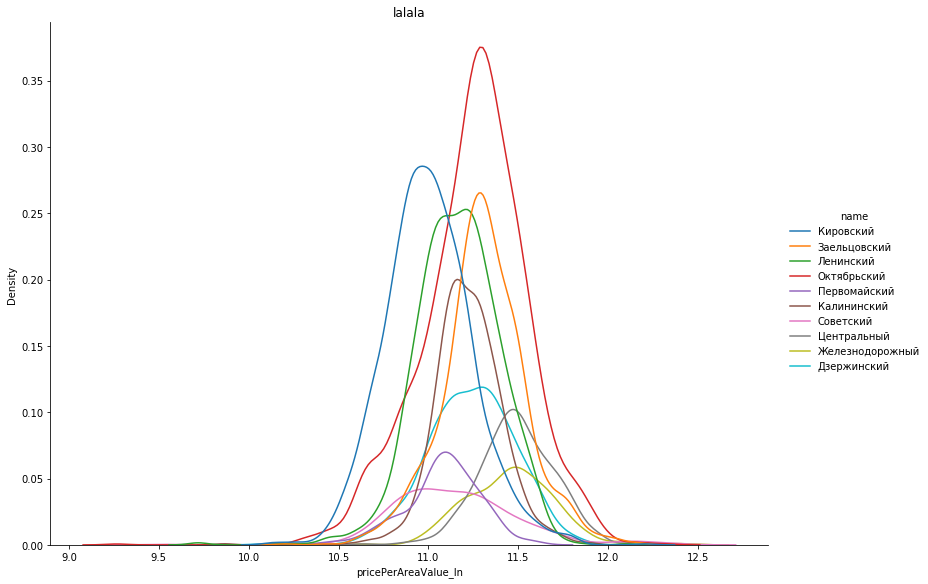

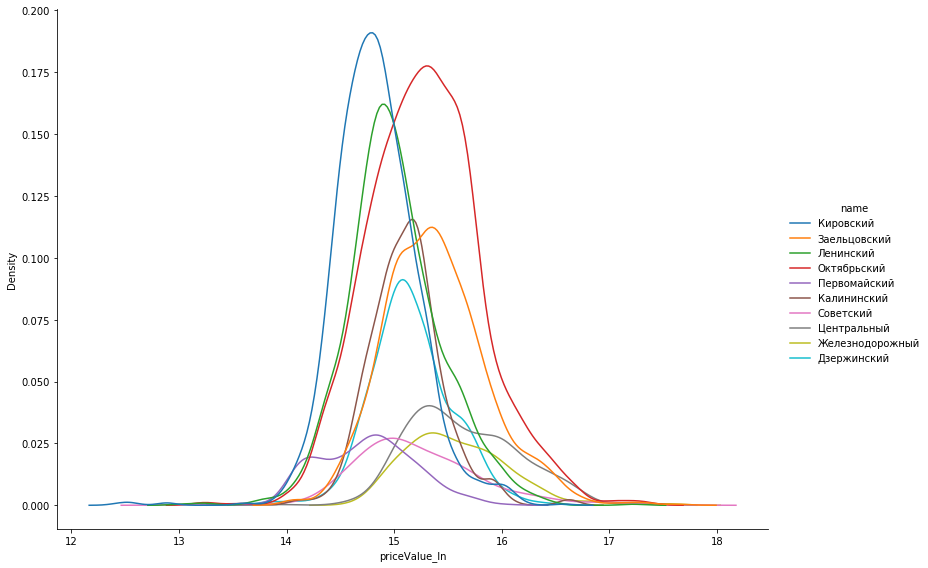

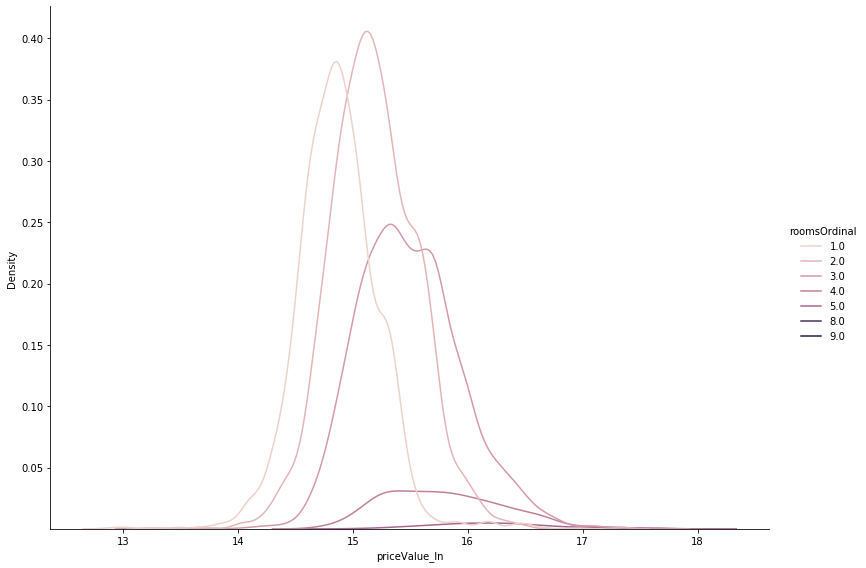

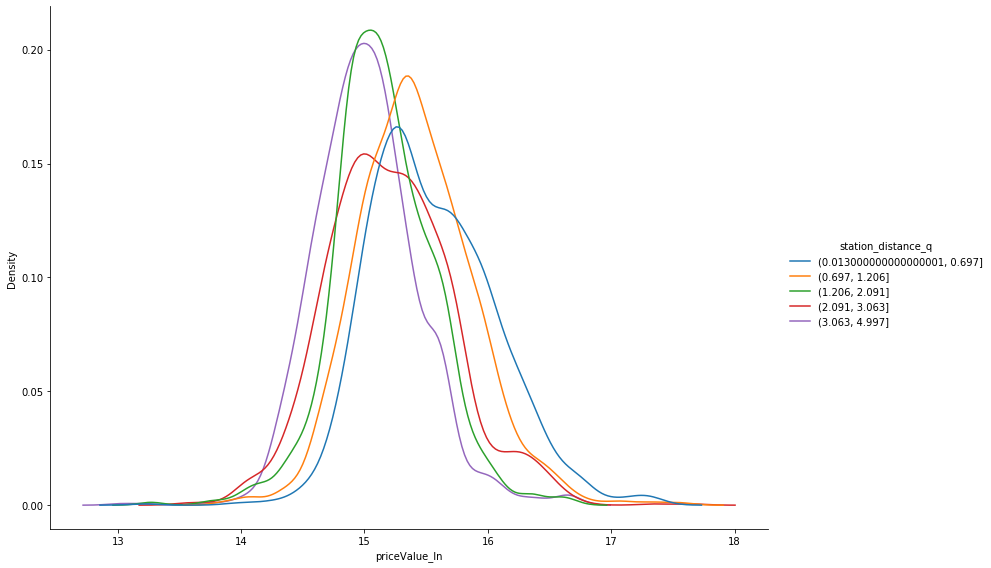

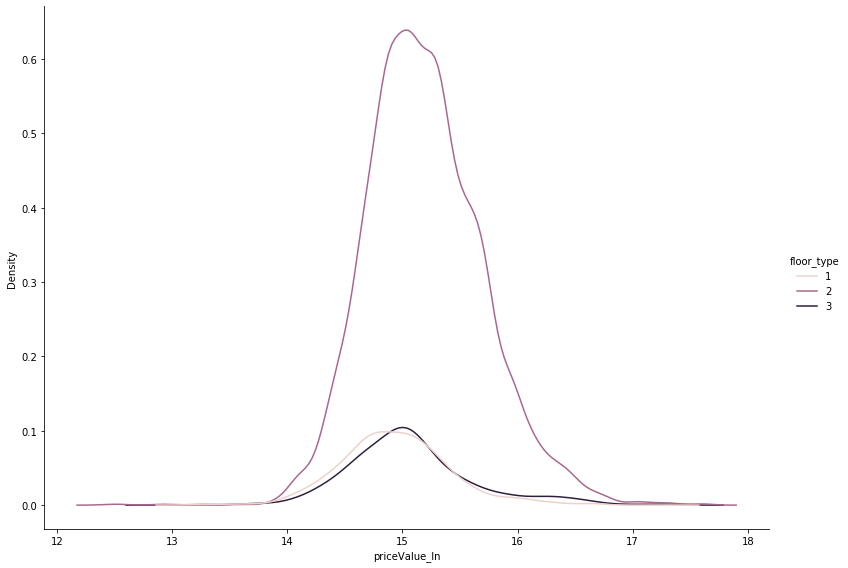

In [22]:
sns.displot(data, 
            x="pricePerAreaValue_ln",
            hue="name",
            kind="kde",
            #fill=True,
            height=8, 
            aspect=11/8,
           ).set(title='lalala')

sns.displot(data, 
            x="priceValue_ln",
            hue="name",
            kind="kde",
            #fill=True,
            height=8, 
            aspect=11/8,)

sns.displot(data, 
            x="priceValue_ln",
            hue="roomsOrdinal",
            kind="kde",
            #fill=True,
            height=8, 
            aspect=11/8,)

sns.displot(data, 
            x="priceValue_ln",
            hue="station_distance_q",
            kind="kde",
            #fill=True,
            height=8, 
            aspect=11/8,)

sns.displot(data, 
            x="priceValue_ln",
            hue="floor_type",
            kind="kde",
            #fill=True,
            height=8, 
            aspect=11/8,
            )


In [23]:
drop = [
    "address",
    "cityId",
    "station_name",
    "name",
    "priceValue_ln",
    "pricePerAreaValue_ln",
    "station_distance_q",
]
    
target = [
    "pricePerAreaValue",
    "priceValue",
    "priceValue_ln",
    "pricePerAreaValue_ln"
]

to_encode = [
    "apartmentSaleType",
    "districtId",
    "station_id",
    "station_lineColors",
]

In [24]:
encoders_dict = {}
for i in to_encode:
    le = LabelEncoder().fit(data[i].astype(str))
    data[i] = le.transform(data[i].astype(str))
    encoders_dict[i] = le

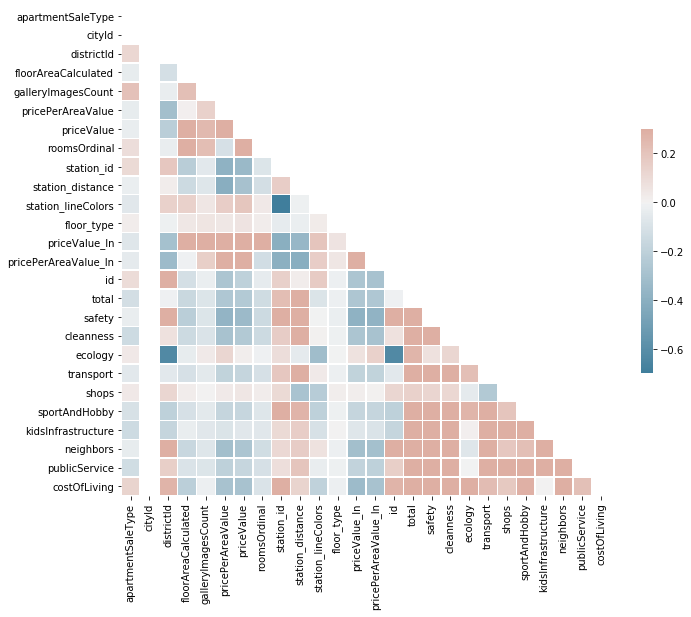

In [25]:
corr = data.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

### MODEL 1 with taregt PRICE

In [65]:
to_dummy = [
    "districtId",
    "station_id",
    "station_lineColors",
    "id",
    "floor_type"
]


X = data.drop(columns=drop+target)
X = X.fillna(-1)

for var in to_dummy:
    cols = [f"{var}_{i}" for i in sorted(X[var].unique())]
    X[cols] = pd.DataFrame(pd.get_dummies(X[var]).values,
                 columns=cols)
X = X.drop(columns=to_dummy)

X = X.fillna(-1)

y = data[target[3]]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [66]:
lr = LinearRegression()
lr.fit(X_train, y_train)
lr.predict(X_train)

print("train", mean_absolute_error(lr.predict(X_train), y_train))
print("test", mean_absolute_error(lr.predict(X_test), y_test))


train 0.1733934424817372
test 0.1752587183744618


In [49]:
pd.DataFrame(zip(X.columns, lr.coef_), columns=("Var", "Coef"))

,Var,Coef
0,apartmentSaleType,-0.014508
1,floor,0.001813
2,floorAreaCalculated,0.010203
3,galleryImagesCount,0.007115
4,roomsOrdinal,0.068776
5,station_distance,-0.001704
6,floors_cnt,0.014436
7,total,-0.102067
8,safety,-0.141782
9,cleanness,0.049251


In [54]:
from sklearn.model_selection import GridSearchCV


depths = np.arange(1, 5)
num_leafs = [1, 5, 10]
splitter = ["best", "random"]
min_weight_fraction_leaf = np.arange(1, 10, 2) / 10
max_features = ["auto", "sqrt", "log2"]
ccp_alpha = np.arange(1, 10, 2) / 10

model = DecisionTreeRegressor(criterion='mae')

param_grid = {
    "max_depth": depths,
    "min_samples_leaf": num_leafs,
    "splitter": splitter,
    "min_weight_fraction_leaf": min_weight_fraction_leaf,
    "ccp_alpha": ccp_alpha
}

gs = GridSearchCV(estimator=model, 
                  param_grid=param_grid,
                  cv=2,
                  verbose=4,
                  n_jobs=3,
                 )
gs = gs.fit(X_train, y_train)

Fitting 2 folds for each of 600 candidates, totalling 1200 fits


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  19 tasks      | elapsed:    8.3s
[Parallel(n_jobs=3)]: Done  92 tasks      | elapsed:   37.1s
[Parallel(n_jobs=3)]: Done 215 tasks      | elapsed:  1.3min
[Parallel(n_jobs=3)]: Done 386 tasks      | elapsed:  2.3min
[Parallel(n_jobs=3)]: Done 607 tasks      | elapsed:  3.4min
[Parallel(n_jobs=3)]: Done 876 tasks      | elapsed:  4.9min
[Parallel(n_jobs=3)]: Done 1195 tasks      | elapsed:  6.6min
[Parallel(n_jobs=3)]: Done 1200 out of 1200 | elapsed:  6.6min finished


In [55]:
gs.best_params_

{'ccp_alpha': 0.1,
 'max_depth': 1,
 'min_samples_leaf': 1,
 'min_weight_fraction_leaf': 0.1,
 'splitter': 'best'}

In [114]:
model

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=4,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=40, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [121]:
params = {'max_depth': 4,}

model = DecisionTreeRegressor(**params)
model.fit(X_train, y_train)
    
print("train", mean_absolute_error(model.predict(X_train), y_train))
print("test", mean_absolute_error(model.predict(X_test), y_test))

train 0.2027883647072483
test 0.20514852540826195


In [122]:
pd.DataFrame(zip(model.feature_importances_, X.columns)).sort_values(by=0, ascending=False)

,0,1
2,0.921229,floorAreaCalculated
5,0.043013,station_distance
17,0.018802,costOfLiving
6,0.011927,floors_cnt
8,0.005029,safety
40,0.000000,station_id_11
45,0.000000,station_lineColors_2
44,0.000000,station_lineColors_1
43,0.000000,station_lineColors_0
42,0.000000,station_id_13


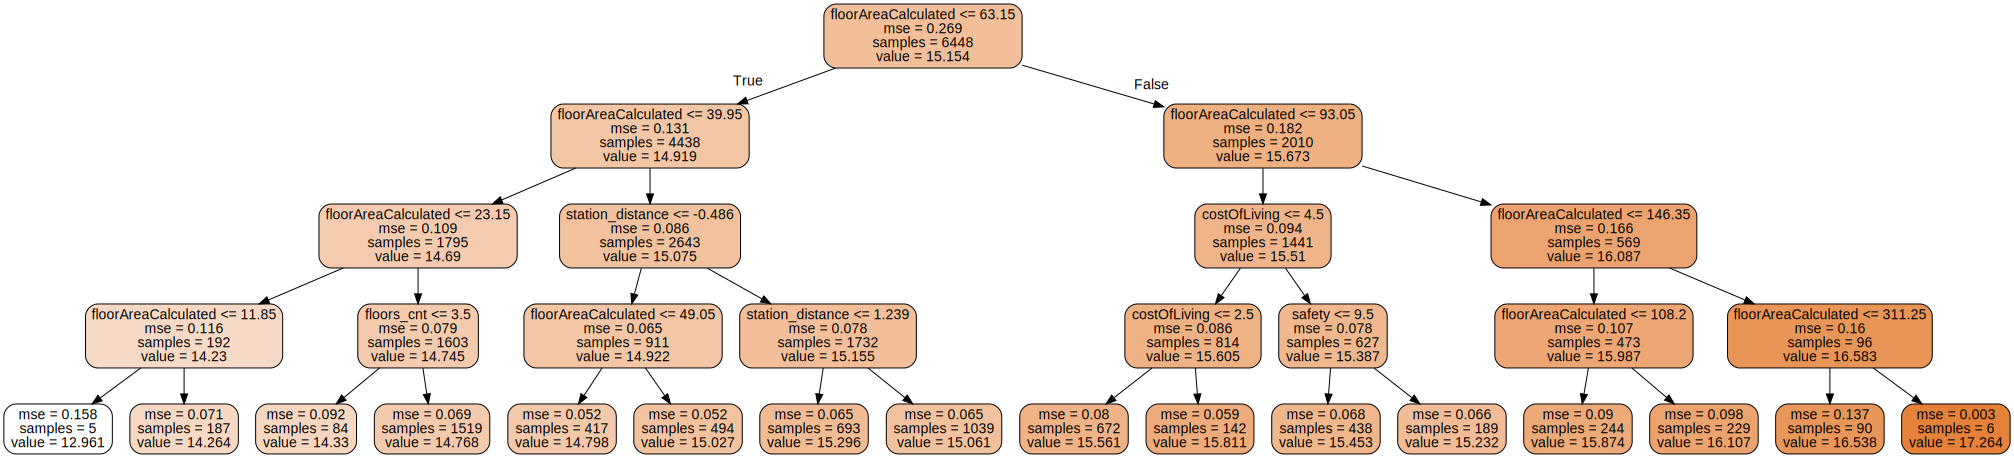

In [126]:
from sklearn.tree import export_graphviz
import graphviz

dot_data = export_graphviz(model, feature_names=X.columns,  
                           filled=True, rounded=True)  

graph = graphviz.Source(dot_data)
graph.render("tree",)
graph